# Машинное обучение, ФКН ВШЭ

## Практическое задание 7. Градиентный бустинг ~~своими руками~~

### Общая информация
Дата выдачи: 04.12.2019

Мягкий дедлайн: 05:59MSK 15.12.2019

Жесткий дедлайн: 05:59MSK 17.12.2019

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

__Задание 1. (0.5 балла)__

Мы будем использовать данные из [соревнования](https://www.kaggle.com/t/b710e05dc0bd424995ca94da5b639869).
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной (TARGET);
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных имеется значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой (AUC-PR).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wolk1612","key":"c51298cdbba412cf53672d870865c080"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

401 - Unauthorized


In [ ]:
! kaggle competitions download -c hse19-gbm

401 - Unauthorized


In [ ]:
! unzip application_test.csv.zip -d test
! unzip application_train.csv.zip -d train

unzip:  cannot find or open application_test.csv.zip, application_test.csv.zip.zip or application_test.csv.zip.ZIP.
unzip:  cannot find or open application_train.csv.zip, application_train.csv.zip.zip or application_train.csv.zip.ZIP.


In [ ]:
train = pd.read_csv('/content/train/application_train.csv')
test = pd.read_csv('/content/test/application_test.csv')

FileNotFoundError: ignored

In [ ]:
train.shape

In [ ]:
y = train["TARGET"]

In [ ]:
y.value_counts()

In [ ]:
train.isna().sum() / train.shape[0]

In [ ]:
desc = pd.read_csv("/content/HomeCredit_columns_description.csv", encoding='cp1252')

In [ ]:
desc[(desc["Table"] == "application_{train|test}.csv") & (desc["Row"] == "EMERGENCYSTATE_MODE")]["Description"].values

NameError: ignored

In [ ]:
desc[(desc["Table"] == "application_{train|test}.csv")]

NameError: ignored

In [ ]:
pd.options.display.max_rows = 150

In [ ]:
train.select_dtypes([np.number])

NameError: ignored

In [ ]:
desc[desc["Table"] == "application_{train|test}.csv"][["Description", "Row"]]

NameError: ignored

In [ ]:
train = train.drop(columns=["SK_ID_CURR", "TARGET"])

In [ ]:
train.dtypes[train.dtypes == "object"].index

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
train["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    152634
Higher education                  52664
Incomplete higher                  7169
Lower secondary                    2673
Academic degree                     117
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
train["CODE_GENDER"] = train["CODE_GENDER"].replace({"XNA" : 0, "F" : 0, "M" : 1})
train["FLAG_OWN_CAR"] = train["FLAG_OWN_CAR"].replace({"N" : 0, "Y" : 1})
train["NAME_CONTRACT_TYPE"] = train["NAME_CONTRACT_TYPE"].replace({"Cash loans" : 0, "Revolving loans" : 1})
train["FLAG_OWN_REALTY"] = train["FLAG_OWN_REALTY"].replace({"N" : 0, "Y" : 1})
train["EMERGENCYSTATE_MODE"] = train["EMERGENCYSTATE_MODE"].replace({"N" : 0, "Y" : 1})

In [ ]:
####### test
"""test["CODE_GENDER"] = test["CODE_GENDER"].replace({"XNA" : 0, "F" : 0, "M" : 1})
test["FLAG_OWN_CAR"] = test["FLAG_OWN_CAR"].replace({"N" : 0, "Y" : 1})
test["NAME_CONTRACT_TYPE"] = test["NAME_CONTRACT_TYPE"].replace({"Cash loans" : 0, "Revolving loans" : 1})
test["FLAG_OWN_REALTY"] = test["FLAG_OWN_REALTY"].replace({"N" : 0, "Y" : 1})
test["EMERGENCYSTATE_MODE"] = test["EMERGENCYSTATE_MODE"].replace({"N" : 0, "Y" : 1}) """

'test["CODE_GENDER"] = test["CODE_GENDER"].replace({"XNA" : 0, "F" : 0, "M" : 1})\ntest["FLAG_OWN_CAR"] = test["FLAG_OWN_CAR"].replace({"N" : 0, "Y" : 1})\ntest["NAME_CONTRACT_TYPE"] = test["NAME_CONTRACT_TYPE"].replace({"Cash loans" : 0, "Revolving loans" : 1})\ntest["FLAG_OWN_REALTY"] = test["FLAG_OWN_REALTY"].replace({"N" : 0, "Y" : 1})\ntest["EMERGENCYSTATE_MODE"] = test["EMERGENCYSTATE_MODE"].replace({"N" : 0, "Y" : 1}) '

In [ ]:
cat = list(train.dtypes[train.dtypes == "object"].index)
numeric = list(train.select_dtypes([np.number]).columns)

In [ ]:
train1 = train.copy()

In [ ]:
train1[cat] = train1[cat].fillna("XNA")
train1[numeric] = train1[numeric].fillna(9999999)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train1, y, train_size=0.7, random_state=0)

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров.
Почему получилась заметная разница в качестве?

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [ ]:
!pip install catboost

     |████████████████████████████████| 63.6MB 36kB/s 


In [ ]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
import time
from sklearn.metrics import precision_recall_curve, auc, make_scorer

In [ ]:
def pr_auc(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

def pr_auc_metric(y_true, y_pred):
    return 'pr_auc', pr_auc(y_true, y_pred) , True

In [ ]:
start_time = time.time()

clf_lgbm = LGBMClassifier(pred_early_stop=True)
clf_lgbm.fit(X=X_train[numeric], y=y_train, eval_set=[(X_test[numeric], y_test)], eval_metric=pr_auc_metric, early_stopping_rounds=20)
y_true_lgbm = clf_lgbm.predict_proba(X_test[numeric])

print(time.time() - start_time)

[1]	valid_0's binary_logloss: 0.277534	valid_0's pr_auc: 0.191854
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.273931	valid_0's pr_auc: 0.192162
[3]	valid_0's binary_logloss: 0.271121	valid_0's pr_auc: 0.196586
[4]	valid_0's binary_logloss: 0.268883	valid_0's pr_auc: 0.198293
[5]	valid_0's binary_logloss: 0.267001	valid_0's pr_auc: 0.200171
[6]	valid_0's binary_logloss: 0.265415	valid_0's pr_auc: 0.201726
[7]	valid_0's binary_logloss: 0.264066	valid_0's pr_auc: 0.203854
[8]	valid_0's binary_logloss: 0.262864	valid_0's pr_auc: 0.206113
[9]	valid_0's binary_logloss: 0.261705	valid_0's pr_auc: 0.208437
[10]	valid_0's binary_logloss: 0.260618	valid_0's pr_auc: 0.211224
[11]	valid_0's binary_logloss: 0.259747	valid_0's pr_auc: 0.212679
[12]	valid_0's binary_logloss: 0.259049	valid_0's pr_auc: 0.214062
[13]	valid_0's binary_logloss: 0.258443	valid_0's pr_auc: 0.214735
[14]	valid_0's binary_logloss: 0.257843	valid_0's pr_auc: 0.215793
[15]	vali

PR AUC = 0.24414


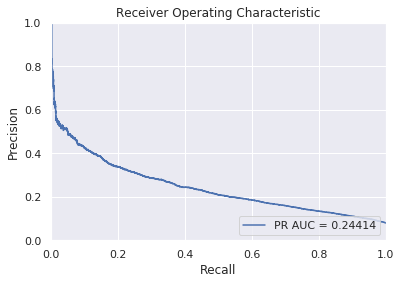

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test,y_true_lgbm[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
st = time.time()

clf_cat = CatBoostClassifier()
clf_cat.fit(X=X_train[numeric], y=y_train, eval_set=[(X_test[numeric], y_test)], early_stopping_rounds=20)
y_pred_cat = clf_cat.predict_proba(X_test[numeric])

print(time.time() - st)

Learning rate set to 0.132113
0:	learn: 0.5666355	test: 0.5659583	best: 0.5659583 (0)	total: 105ms	remaining: 1m 44s
1:	learn: 0.4778660	test: 0.4768701	best: 0.4768701 (1)	total: 218ms	remaining: 1m 48s
2:	learn: 0.4153693	test: 0.4139987	best: 0.4139987 (2)	total: 322ms	remaining: 1m 47s
3:	learn: 0.3742592	test: 0.3725704	best: 0.3725704 (3)	total: 426ms	remaining: 1m 46s
4:	learn: 0.3428318	test: 0.3407970	best: 0.3407970 (4)	total: 538ms	remaining: 1m 47s
5:	learn: 0.3195604	test: 0.3172187	best: 0.3172187 (5)	total: 653ms	remaining: 1m 48s
6:	learn: 0.3046608	test: 0.3021735	best: 0.3021735 (6)	total: 762ms	remaining: 1m 48s
7:	learn: 0.2931136	test: 0.2904900	best: 0.2904900 (7)	total: 873ms	remaining: 1m 48s
8:	learn: 0.2842698	test: 0.2814880	best: 0.2814880 (8)	total: 990ms	remaining: 1m 49s
9:	learn: 0.2772481	test: 0.2743097	best: 0.2743097 (9)	total: 1.11s	remaining: 1m 49s
10:	learn: 0.2732975	test: 0.2703019	best: 0.2703019 (10)	total: 1.21s	remaining: 1m 49s
11:	learn: 

PR AUC = 0.24487


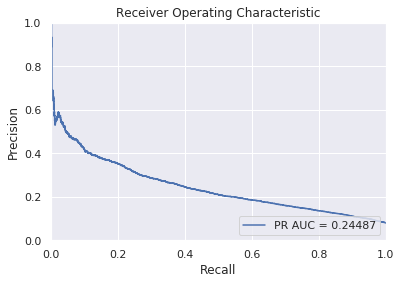

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_cat[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

Сложно сказать наверняка. Возможно из-за того что catboost выбрал более высокий шаг при обучении. Учитывая, что алгоритмы оптимизируют logloss, а не pr-auc, возможно. Возможно из-за количества итераций установленных по дефолту, и LGBM c 100 итераций не успевает обучиться, в отличии от catboost c 1000 итераций.

__Задание 3. (2 балла)__

Подберите оптимальные с точки зрения метрики качества параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Масштаб значений предлагается посмотреть в семинаре про библиотеки.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [ ]:
def pr_auc(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

def pr_auc_metric(y_true, y_pred):
    return 'pr_auc', pr_auc(y_true, y_pred) , True

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [ ]:
learning_rate = [0.01, 0.1, 0.2]
depth = [3, 5, 7]
params = {"learning_rate" : [], "depth" : [], "pr_auc" : [], "n_est" : []}

for lr in learning_rate:
  for d in depth:
    clf = LGBMClassifier(pred_early_stop=True, n_estimators=10000, learning_rate=lr, max_depth=d)
    params["learning_rate"].append(lr)
    params["depth"].append(d)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    a = []
    for train_index, test_index in kf.split(train1[numeric], y):
      clf.fit(X=train1[numeric].iloc[train_index], y=y.iloc[train_index],
              eval_set=[(train1[numeric].iloc[test_index], y.iloc[test_index])], eval_metric=pr_auc_metric, early_stopping_rounds=20)

      a.append(pr_auc(y.iloc[test_index], clf.predict_proba(train1[numeric].iloc[test_index])[:, 1]))

    params["pr_auc"].append(np.mean(a))
    params["n_est"].append(clf.best_iteration_ + 1)

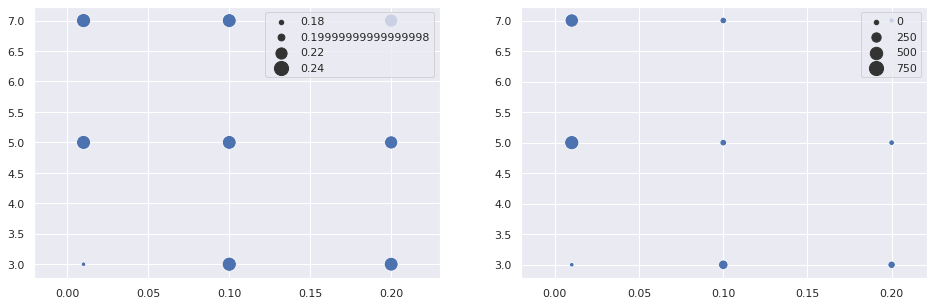

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
plt.sca(axes[0])
sns.scatterplot(x=params["learning_rate"], y=params["depth"], size=params["pr_auc"], sizes=(20, 200))
plt.sca(axes[1])
sns.scatterplot(x=params["learning_rate"], y=params["depth"], size=params["n_est"], sizes=(20, 200))

In [ ]:
print(params["learning_rate"][np.argmax(params["pr_auc"])], params["depth"][np.argmax(params["pr_auc"])], np.max(params["pr_auc"]))

NameError: ignored

In [ ]:
learning_rate_cat = [0.01, 0.1, 0.2]
depth_cat = [3, 6, 10]
params_cat = {"learning_rate" : [], "depth" : [], "pr_auc" : [], "n_est" : []}

for lr in learning_rate_cat:
  for d in depth_cat:
    clf = CatBoostClassifier(iterations=10000, depth=d, eval_metric="AUC",
                             early_stopping_rounds=20, learning_rate=lr)

    params_cat["learning_rate"].append(lr)
    params_cat["depth"].append(d)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    a = []
    for train_index, test_index in kf.split(train1[numeric], y):
      clf.fit(X=train1[numeric].iloc[train_index], y=y.iloc[train_index],
              eval_set=[(train1[numeric].iloc[test_index], y.iloc[test_index])])

      a.append(pr_auc(y.iloc[test_index], clf.predict_proba(train1[numeric].iloc[test_index])[:, 1]))

    params_cat["pr_auc"].append(np.mean(a))
    params_cat["n_est"].append(clf.best_iteration_ + 1)

0:	test: 0.5944335	best: 0.5944335 (0)	total: 78.1ms	remaining: 13m 1s
1:	test: 0.6244221	best: 0.6244221 (1)	total: 155ms	remaining: 12m 56s
2:	test: 0.6374758	best: 0.6374758 (2)	total: 234ms	remaining: 13m
3:	test: 0.6404901	best: 0.6404901 (3)	total: 320ms	remaining: 13m 19s
4:	test: 0.6803964	best: 0.6803964 (4)	total: 396ms	remaining: 13m 12s
5:	test: 0.6805695	best: 0.6805695 (5)	total: 469ms	remaining: 13m 1s
6:	test: 0.6868942	best: 0.6868942 (6)	total: 561ms	remaining: 13m 20s
7:	test: 0.6904482	best: 0.6904482 (7)	total: 640ms	remaining: 13m 19s
8:	test: 0.6878788	best: 0.6904482 (7)	total: 720ms	remaining: 13m 19s
9:	test: 0.6860976	best: 0.6904482 (7)	total: 803ms	remaining: 13m 22s
10:	test: 0.6846333	best: 0.6904482 (7)	total: 882ms	remaining: 13m 21s
11:	test: 0.6901534	best: 0.6904482 (7)	total: 965ms	remaining: 13m 22s
12:	test: 0.6878966	best: 0.6904482 (7)	total: 1.06s	remaining: 13m 32s
13:	test: 0.6854747	best: 0.6904482 (7)	total: 1.14s	remaining: 13m 33s
14:	tes

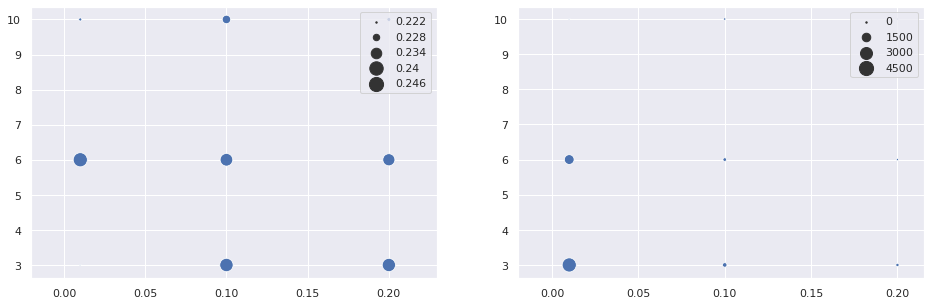

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
plt.sca(axes[0])
sns.scatterplot(x=params_cat["learning_rate"], y=params_cat["depth"], size=params_cat["pr_auc"], sizes=(2, 200))
plt.sca(axes[1])
sns.scatterplot(x=params_cat["learning_rate"], y=params_cat["depth"], size=params_cat["n_est"], sizes=(2, 200))

In [ ]:
print(params_cat["learning_rate"][np.argmax(params_cat["pr_auc"])], params_cat["depth"][np.argmax(params_cat["pr_auc"])], np.max(params_cat["pr_auc"]))

0.01 6 0.24172798633370948


In [ ]:
params_cat["learning_rate"]

[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2]

In [ ]:
 params_cat["depth"]

[3, 6, 10, 3, 6, 10, 3, 6, 10]

In [ ]:
params_cat["pr_auc"]

NameError: ignored

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов.

Как меняется время, необходимое для обучения моделей в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков.

In [ ]:
def pr_auc(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

def pr_auc_metric(y_true, y_pred):
    return 'pr_auc', pr_auc(y_true, y_pred) , True

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
for i in cat:
  le = LabelEncoder()
  train1[i] = le.fit_transform(train1[i])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train1, y, train_size=0.7, random_state=0)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(categories='auto', handle_unknown="ignore"), cat)
])

ohe_X_train = column_transformer.fit_transform(X_train)
ohe_X_test = column_transformer.transform(X_test)

In [ ]:
st = time.time()

ohe_clf_lgbm = CatBoostClassifier(early_stopping_rounds=20, iterations=10000, learning_rate=0.01)
ohe_clf_lgbm.fit(X=ohe_X_train, y=y_train, eval_set=[(ohe_X_test, y_test)])
y_pred_cat = ohe_clf_lgbm.predict_proba(ohe_X_test)

print(time.time() - st)

0:	learn: 0.6829190	test: 0.6828765	best: 0.6828765 (0)	total: 56ms	remaining: 9m 19s
1:	learn: 0.6729466	test: 0.6728694	best: 0.6728694 (1)	total: 116ms	remaining: 9m 41s
2:	learn: 0.6633046	test: 0.6631863	best: 0.6631863 (2)	total: 178ms	remaining: 9m 54s
3:	learn: 0.6538585	test: 0.6537027	best: 0.6537027 (3)	total: 240ms	remaining: 9m 58s
4:	learn: 0.6445797	test: 0.6443882	best: 0.6443882 (4)	total: 311ms	remaining: 10m 22s
5:	learn: 0.6356177	test: 0.6353868	best: 0.6353868 (5)	total: 370ms	remaining: 10m 16s
6:	learn: 0.6268550	test: 0.6265862	best: 0.6265862 (6)	total: 432ms	remaining: 10m 17s
7:	learn: 0.6182650	test: 0.6179611	best: 0.6179611 (7)	total: 492ms	remaining: 10m 14s
8:	learn: 0.6099793	test: 0.6096367	best: 0.6096367 (8)	total: 545ms	remaining: 10m 5s
9:	learn: 0.6019307	test: 0.6015554	best: 0.6015554 (9)	total: 605ms	remaining: 10m 4s
10:	learn: 0.5939929	test: 0.5935848	best: 0.5935848 (10)	total: 665ms	remaining: 10m 3s
11:	learn: 0.5862360	test: 0.5857880	b

PR AUC = 0.12040


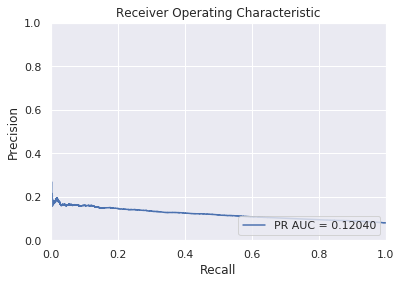

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_cat[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
clf = LGBMClassifier(pred_early_stop=True, n_estimators=10000)
clf.fit(X=ohe_X_train, y=y_train, eval_set=[(ohe_X_test, y_test)], eval_metric=pr_auc_metric, early_stopping_rounds=100)
y_pred = clf.predict_proba(ohe_X_test)

[1]	valid_0's binary_logloss: 0.277254	valid_0's pr_auc: 0.111688
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.276461	valid_0's pr_auc: 0.113284
[3]	valid_0's binary_logloss: 0.275836	valid_0's pr_auc: 0.113197
[4]	valid_0's binary_logloss: 0.27533	valid_0's pr_auc: 0.113228
[5]	valid_0's binary_logloss: 0.274892	valid_0's pr_auc: 0.1136
[6]	valid_0's binary_logloss: 0.274527	valid_0's pr_auc: 0.114282
[7]	valid_0's binary_logloss: 0.274172	valid_0's pr_auc: 0.115239
[8]	valid_0's binary_logloss: 0.273893	valid_0's pr_auc: 0.115611
[9]	valid_0's binary_logloss: 0.273665	valid_0's pr_auc: 0.115414
[10]	valid_0's binary_logloss: 0.273454	valid_0's pr_auc: 0.115493
[11]	valid_0's binary_logloss: 0.273328	valid_0's pr_auc: 0.115848
[12]	valid_0's binary_logloss: 0.273172	valid_0's pr_auc: 0.116423
[13]	valid_0's binary_logloss: 0.273007	valid_0's pr_auc: 0.116681
[14]	valid_0's binary_logloss: 0.272889	valid_0's pr_auc: 0.116702
[15]	valid_

PR AUC = 0.11840


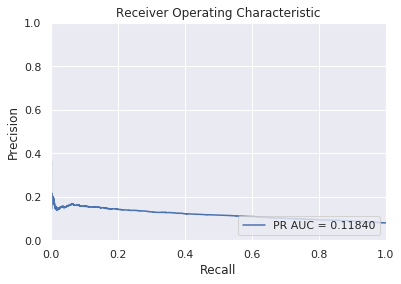

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train1, y, train_size=0.7, random_state=0)

In [ ]:
st = time.time()

print(time.time() - st)
clf_lgbm = LGBMClassifier(pred_early_stop=True, n_estimators=10000, learning_rate=0.01)
clf_lgbm.fit(X=X_train, y=y_train, eval_set=[(X_test, y_test)], eval_metric=pr_auc_metric, early_stopping_rounds=20, categorical_feature=cat)
y_pred = clf_lgbm.predict_proba(X_test)

print(time.time() - st)

3.266334533691406e-05


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['EMERGENCYSTATE_MODE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's binary_logloss: 0.277709	valid_0's pr_auc: 0.194928
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.277192	valid_0's pr_auc: 0.202066
[3]	valid_0's binary_logloss: 0.276686	valid_0's pr_auc: 0.201029
[4]	valid_0's binary_logloss: 0.276203	valid_0's pr_auc: 0.201516
[5]	valid_0's binary_logloss: 0.27572	valid_0's pr_auc: 0.204219
[6]	valid_0's binary_logloss: 0.275247	valid_0's pr_auc: 0.204888
[7]	valid_0's binary_logloss: 0.274792	valid_0's pr_auc: 0.206201
[8]	valid_0's binary_logloss: 0.274344	valid_0's pr_auc: 0.208144
[9]	valid_0's binary_logloss: 0.273908	valid_0's pr_auc: 0.209077
[10]	valid_0's binary_logloss: 0.273488	valid_0's pr_auc: 0.20975
[11]	valid_0's binary_logloss: 0.273078	valid_0's pr_auc: 0.210049
[12]	valid_0's binary_logloss: 0.272675	valid_0's pr_auc: 0.210149
[13]	valid_0's binary_logloss: 0.272288	valid_0's pr_auc: 0.210698
[14]	valid_0's binary_logloss: 0.271901	valid_0's pr_auc: 0.211311
[15]	valid_

PR AUC = 0.24628


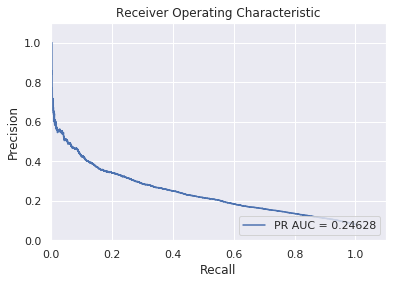

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
clf = CatBoostClassifier(early_stopping_rounds=20, iterations=10000, learning_rate=0.01, depth=6)
clf.fit(X=X_train, y=y_train, eval_set=[(X_test, y_test)], cat_features=cat)
y_pred_cat = clf.predict_proba(X_test)

0:	learn: 0.6825201	test: 0.6824777	best: 0.6824777 (0)	total: 660ms	remaining: 1h 49m 55s
1:	learn: 0.6725812	test: 0.6725023	best: 0.6725023 (1)	total: 1.19s	remaining: 1h 39m 24s
2:	learn: 0.6626151	test: 0.6625015	best: 0.6625015 (2)	total: 1.75s	remaining: 1h 37m 28s
3:	learn: 0.6531936	test: 0.6530422	best: 0.6530422 (3)	total: 2.3s	remaining: 1h 35m 41s
4:	learn: 0.6439158	test: 0.6437246	best: 0.6437246 (4)	total: 2.83s	remaining: 1h 34m 20s
5:	learn: 0.6341297	test: 0.6338873	best: 0.6338873 (5)	total: 3.4s	remaining: 1h 34m 17s
6:	learn: 0.6249867	test: 0.6246976	best: 0.6246976 (6)	total: 3.94s	remaining: 1h 33m 47s
7:	learn: 0.6158183	test: 0.6154784	best: 0.6154784 (7)	total: 4.49s	remaining: 1h 33m 24s
8:	learn: 0.6075660	test: 0.6071925	best: 0.6071925 (8)	total: 5.03s	remaining: 1h 33m 2s
9:	learn: 0.5994847	test: 0.5990763	best: 0.5990763 (9)	total: 5.57s	remaining: 1h 32m 39s
10:	learn: 0.5916105	test: 0.5911661	best: 0.5911661 (10)	total: 6.09s	remaining: 1h 32m 8s
1

PR AUC = 0.24972


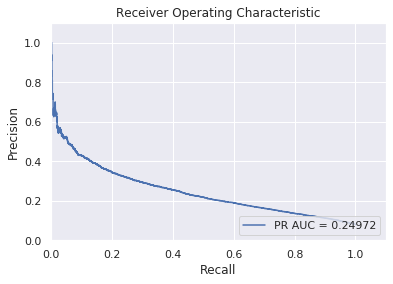

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_cat[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train1, y, train_size=0.7, random_state=0)

In [ ]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()
X_train1["target"] = y_train
kf = KFold(n_splits=3)
for train_mask, test_mask in kf.split(X_train1):
  for col in cat:
    X_train1.iloc[test_mask][col] = X_train1.iloc[test_mask][col].map(
        X_train1.iloc[train_mask].groupby(col)['target'].mean())

    X_test1[col] = X_test1[col].map(X_train1.groupby(col)[col].mean())

for col in cat:
  X_train1[col] = X_train1[col] + np.random.normal(scale = 0.1 * np.std(X_train1[col]), size=X_train1.shape[0])
  X_test1[col] = X_test1[col] + np.random.normal(scale = 0.1 * np.std(X_train1[col]), size=X_test1.shape[0])

X_train1 = X_train1.drop("target", axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
st = time.time()

my_clf_lgbm = LGBMClassifier(pred_early_stop=True, n_estimators=10000, learning_rate=0.01)
my_clf_lgbm.fit(X=X_train1, y=y_train, eval_set=[(X_test1, y_test)], eval_metric=pr_auc_metric, early_stopping_rounds=20)
y_pred = my_clf_lgbm.predict_proba(X_test1)

print(time.time() - st)

[1]	valid_0's binary_logloss: 0.277715	valid_0's pr_auc: 0.193193
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.277201	valid_0's pr_auc: 0.193465
[3]	valid_0's binary_logloss: 0.276702	valid_0's pr_auc: 0.198533
[4]	valid_0's binary_logloss: 0.276223	valid_0's pr_auc: 0.199739
[5]	valid_0's binary_logloss: 0.27574	valid_0's pr_auc: 0.202285
[6]	valid_0's binary_logloss: 0.275273	valid_0's pr_auc: 0.203724
[7]	valid_0's binary_logloss: 0.274824	valid_0's pr_auc: 0.204385
[8]	valid_0's binary_logloss: 0.274396	valid_0's pr_auc: 0.204511
[9]	valid_0's binary_logloss: 0.273969	valid_0's pr_auc: 0.206194
[10]	valid_0's binary_logloss: 0.273546	valid_0's pr_auc: 0.20725
[11]	valid_0's binary_logloss: 0.273133	valid_0's pr_auc: 0.20779
[12]	valid_0's binary_logloss: 0.272734	valid_0's pr_auc: 0.208411
[13]	valid_0's binary_logloss: 0.272343	valid_0's pr_auc: 0.209111
[14]	valid_0's binary_logloss: 0.271959	valid_0's pr_auc: 0.209539
[15]	valid_0

PR AUC = 0.24663


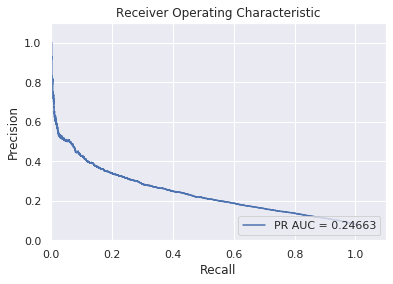

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
my_clf_cat = CatBoostClassifier(early_stopping_rounds=20, iterations=10000, learning_rate=0.01, depth=6)
my_clf_cat.fit(X=X_train1, y=y_train, eval_set=[(X_test1, y_test)])
y_pred_cat = my_clf_cat.predict_proba(X_test1)

0:	learn: 0.6829418	test: 0.6828940	best: 0.6828940 (0)	total: 144ms	remaining: 23m 59s
1:	learn: 0.6729227	test: 0.6728443	best: 0.6728443 (1)	total: 264ms	remaining: 22m 1s
2:	learn: 0.6628478	test: 0.6627269	best: 0.6627269 (2)	total: 393ms	remaining: 21m 49s
3:	learn: 0.6533876	test: 0.6532270	best: 0.6532270 (3)	total: 511ms	remaining: 21m 16s
4:	learn: 0.6434231	test: 0.6432180	best: 0.6432180 (4)	total: 643ms	remaining: 21m 25s
5:	learn: 0.6341163	test: 0.6338668	best: 0.6338668 (5)	total: 771ms	remaining: 21m 23s
6:	learn: 0.6251259	test: 0.6248393	best: 0.6248393 (6)	total: 897ms	remaining: 21m 21s
7:	learn: 0.6162252	test: 0.6158864	best: 0.6158864 (7)	total: 1.02s	remaining: 21m 20s
8:	learn: 0.6075362	test: 0.6071503	best: 0.6071503 (8)	total: 1.14s	remaining: 21m 10s
9:	learn: 0.5991980	test: 0.5987838	best: 0.5987838 (9)	total: 1.26s	remaining: 21m 3s
10:	learn: 0.5909037	test: 0.5904564	best: 0.5904564 (10)	total: 1.39s	remaining: 21m 2s
11:	learn: 0.5831583	test: 0.5826

PR AUC = 0.24900


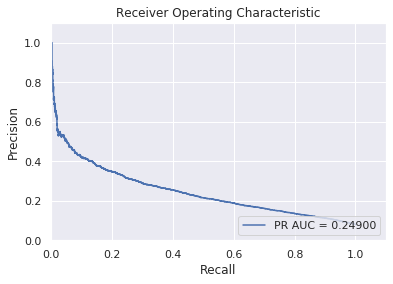

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_cat[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

На OHE получились плохие результаты как у catboost, так и у lgbm.
Счётчик с добавлением случайной компоненты, показал результат очень похожий по качеству на встроенные способы обработки в алгоритмах ГБ.

lgbm(встроенный): итераций - 863, качество - 0.24628, время- 90 сек.

lgbm(счётчик):итераций - 900, качество -0.24663, время- 103 сек.

catboost(встроенный):итераций - 1911, качество - 0.24972, время- 1016.

catboost(счётчик):итераций - 1903, качество - 0.24900, время- 238 сек.

Лучшие качество достигает с помощью catboost с встроенной обработкой категориальных признаков, но это занимает в 4 раза больше времени, чем обработка категориальных признаков счётчиком.

__Задание 5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество. Обратите внимание на данные, на которых обучаются

In [ ]:
clf_cat = clf

In [ ]:
my_clf_cat
my_clf_lgbm
clf_lgbm
clf_cat


In [ ]:
y_pred_cat = clf_cat.predict_proba(X_test)
y_pred_lgbm = clf_lgbm.predict_proba(X_test)
my_pred_cat = my_clf_cat.predict_proba(X_test1)
my_pred_lgbm = my_clf_lgbm.predict_proba(X_test1)

Text(0.5, 0, 'Recall')

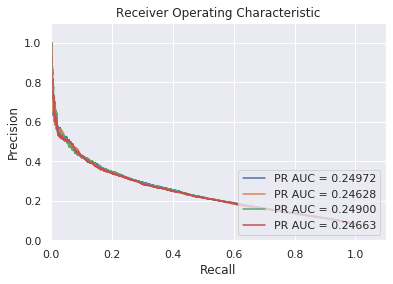

In [ ]:
 for i in [y_pred_cat, y_pred_lgbm, my_pred_cat, my_pred_lgbm]:
  y_pred = clf_cat.predict_proba(X_test)
  precision, recall, thresholds = precision_recall_curve(y_test, i[:, 1])
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label = 'PR AUC = %0.5f' % pr_auc)


plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')


In [ ]:
X_bled = np.concatenate((y_pred_cat[:, 1].reshape(-1, 1), y_pred_lgbm[:, 1].reshape(-1, 1),
                my_pred_cat[:,1].reshape(-1, 1), my_pred_lgbm[:, 1].reshape(-1, 1)), axis=1)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bled, y_test, random_state=42, test_size=0.3)

In [ ]:
C = np.logspace(-30, 5, 100)
value = []

for i in C:
  clf_b = SGDClassifier(random_state=1, alpha=i, loss="log")
  clf_b.fit(X_train_b, y_train_b)
  y_pred_b = clf_b.predict_proba(X_test_b)
  value.append(pr_auc(y_test_b, y_pred_b[:, 1]))

Text(0.5, 1.0, 'balance')

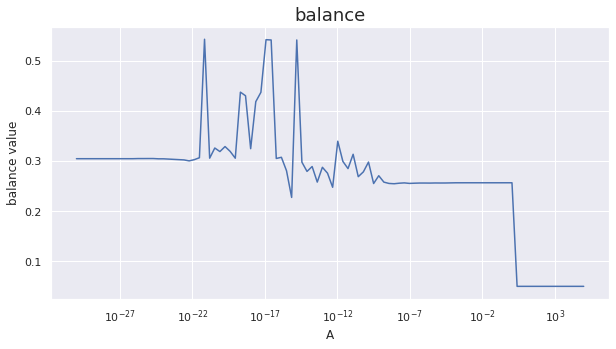

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))
axes.plot(C, value)
plt.xscale("log")
axes.set_xlabel("Regularisation")
axes.set_ylabel("value")
axes.set_title("PR AUC on test", fontsize=18)

In [ ]:
clf_b = SGDClassifier(random_state=1, alpha=1e-27, loss="log")
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict_proba(X_test_b)

PR AUC = 0.30466


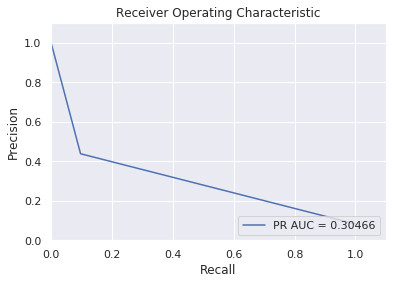

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_b, y_pred_b[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
def pr_auc(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

def pr_auc_metric(y_true, y_pred):
    return 'pr_auc', pr_auc(y_true, y_pred) , True

pr_auc_scorer = make_scorer(
    pr_auc,
    greater_is_better=True
)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
C = np.logspace(-25, 3, 28)
values = []

for i in C:
  clf_b = SGDClassifier(loss="log")
  values.append(np.mean(cross_val_score(clf_b, X_bled, y_test, cv=3, scoring=pr_auc_scorer)))

Text(0.5, 1.0, 'PR AUC on test')

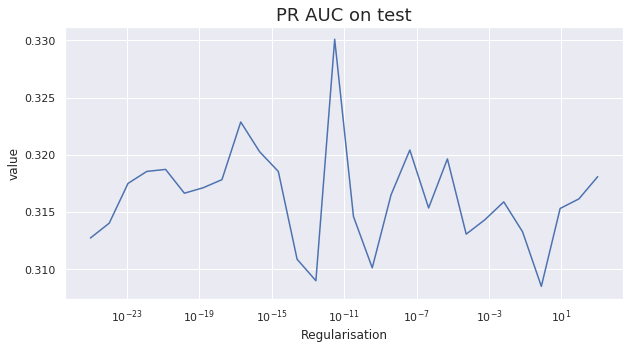

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))
axes.plot(C, values)
plt.xscale("log")
axes.set_xlabel("Regularisation")
axes.set_ylabel("value")
axes.set_title("PR AUC on test", fontsize=18)

In [ ]:
C = np.logspace(-10, 5, 16)
value = []
w_cat, w_lgbm, w_my_cat, w_my_lgbm = [], [], [], []

for i in C:
  clf_b = SGDClassifier(alpha=i, loss="log")
  clf_b.fit(X_train_b, y_train_b)
  y_pred_b = clf_b.predict_proba(X_test_b)
  value.append(pr_auc(y_test_b, y_pred_b[:, 1]))
  w_cat.append(clf_b.coef_[0][0] / np.sum(clf_b.coef_))
  w_lgbm.append(clf_b.coef_[0][1] / np.sum(clf_b.coef_))
  w_my_cat.append(clf_b.coef_[0][2] / np.sum(clf_b.coef_))
  w_my_lgbm.append(clf_b.coef_[0][3] / np.sum(clf_b.coef_))

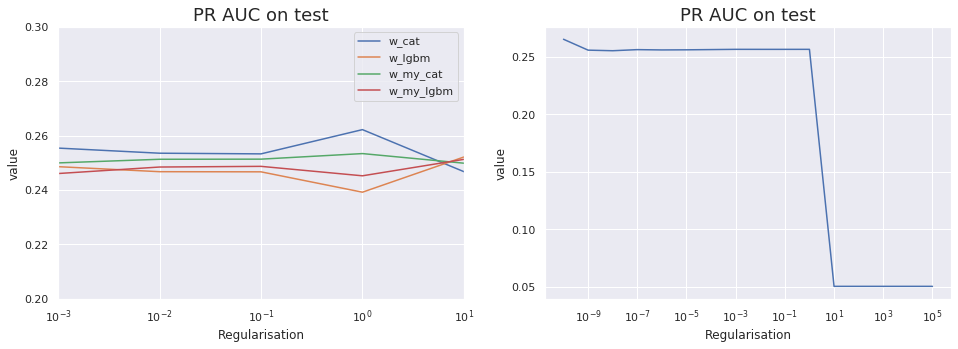

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
axes[1].plot(C, value)
plt.sca(axes[1])
plt.xscale("log")
axes[1].set_xlabel("Regularisation")
axes[1].set_ylabel("value")
axes[1].set_title("PR AUC on test", fontsize=18)

axes[0].plot(C, w_cat, label="w_cat")
axes[0].plot(C, w_lgbm, label="w_lgbm")
axes[0].plot(C, w_my_cat, label="w_my_cat")
axes[0].plot(C, w_my_lgbm, label="w_my_lgbm")
plt.sca(axes[0])
plt.xscale("log")
axes[0].set_xlabel("Regularisation")
axes[0].set_ylabel("value")
axes[0].set_title("PR AUC on test", fontsize=18)
plt.xlim([1e-3, 10])
plt.ylim([0.2, 0.3])
plt.legend()

После регуляризации ниже 1e-3 наступает переобучение алгоритма, что выражается в хаотическом росте весов. При регуляризации получаемое качество получается лучше, чем качество любого из отдельных алгоритмов.

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог, с которого начинается "хвост" менее важных признаков) и обучите модель с теми же параметрами на получившихся данных. Сильно ли упало качество при удалении признаков?

In [ ]:
my_clf_cat
my_clf_lgbm
clf_lgbm
clf_cat

Text(0.5, 1.0, 'Feature importance')

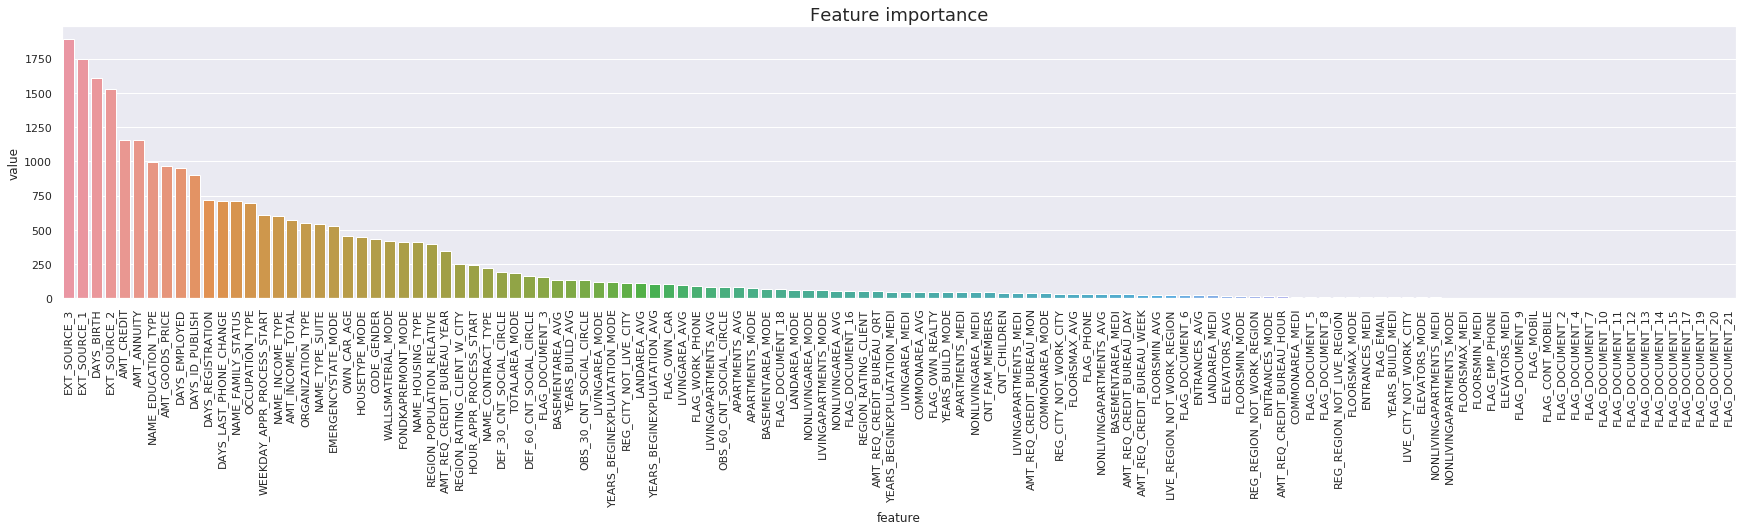

In [ ]:
to_plot_cat = pd.DataFrame(sorted(list(zip(my_clf_cat.feature_importances_, X_train1.columns.values)), key=lambda x: x[0], reverse=True), columns=["value", "feature"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (30, 5))
sns.barplot(x="feature", y="value", data=to_plot);
plt.xticks(rotation=90)
plt.title("Feature importance", fontsize=18)

PR AUC = 0.24900


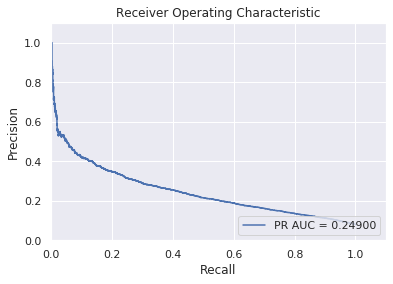

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, my_pred_cat[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

In [ ]:
new_cat = list(to_plot_cat[to_plot_cat["value"] > 0.5]["feature"])

In [ ]:
my_new_clf_cat = CatBoostClassifier(early_stopping_rounds=20, iterations=10000, learning_rate=0.01, depth=6)
my_new_clf_cat.fit(X=X_train1[new_cat], y=y_train, eval_set=[(X_test1[new_cat], y_test)])
y_pred_cat = my_new_clf_cat.predict_proba(X_test1[new_cat])

0:	learn: 0.6822246	test: 0.6821866	best: 0.6821866 (0)	total: 76.1ms	remaining: 12m 41s
1:	learn: 0.6716490	test: 0.6715719	best: 0.6715719 (1)	total: 151ms	remaining: 12m 35s
2:	learn: 0.6615358	test: 0.6614134	best: 0.6614134 (2)	total: 224ms	remaining: 12m 26s
3:	learn: 0.6515515	test: 0.6513981	best: 0.6513981 (3)	total: 304ms	remaining: 12m 39s
4:	learn: 0.6417461	test: 0.6415501	best: 0.6415501 (4)	total: 385ms	remaining: 12m 49s
5:	learn: 0.6325414	test: 0.6323110	best: 0.6323110 (5)	total: 460ms	remaining: 12m 45s
6:	learn: 0.6236748	test: 0.6234107	best: 0.6234107 (6)	total: 538ms	remaining: 12m 48s
7:	learn: 0.6149662	test: 0.6146685	best: 0.6146685 (7)	total: 615ms	remaining: 12m 47s
8:	learn: 0.6058232	test: 0.6054807	best: 0.6054807 (8)	total: 690ms	remaining: 12m 45s
9:	learn: 0.5969591	test: 0.5965730	best: 0.5965730 (9)	total: 767ms	remaining: 12m 46s
10:	learn: 0.5888712	test: 0.5884462	best: 0.5884462 (10)	total: 847ms	remaining: 12m 48s
11:	learn: 0.5811239	test: 0.

PR AUC = 0.24652


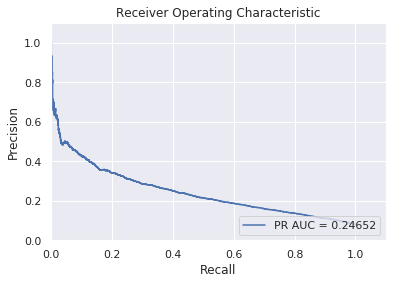

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_cat[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

Text(0.5, 1.0, 'Feature importance')

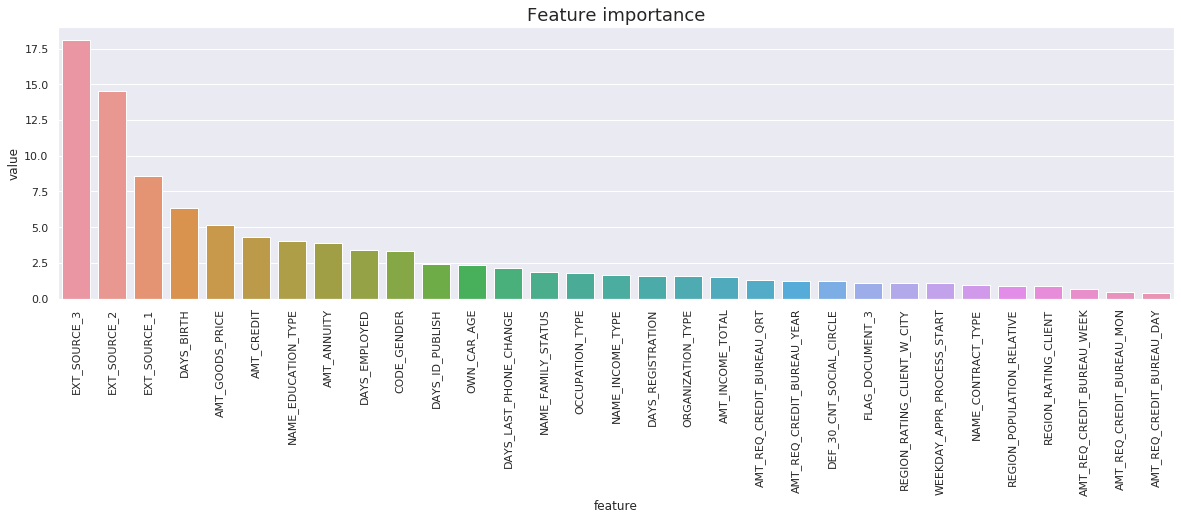

In [ ]:
to_plot_cat = pd.DataFrame(sorted(list(zip(my_new_clf_cat.feature_importances_, X_train1[new_cat].columns.values)), key=lambda x: x[0], reverse=True), columns=["value", "feature"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20, 5))
sns.barplot(x="feature", y="value", data=to_plot_cat);
plt.xticks(rotation=90)
plt.title("Feature importance", fontsize=18)

Text(0.5, 1.0, 'Feature importance')

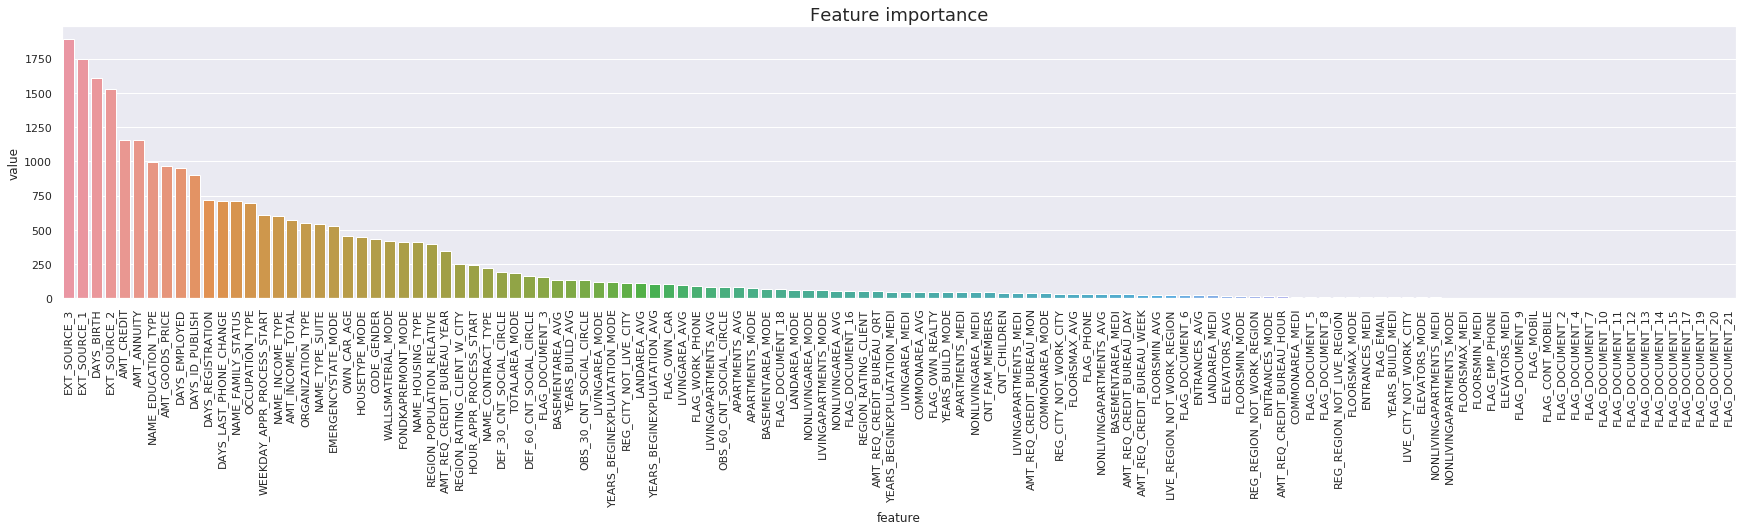

In [ ]:
to_plot_lgbm = pd.DataFrame(sorted(list(zip(my_clf_lgbm.feature_importances_, X_train1.columns.values)), key=lambda x: x[0], reverse=True), columns=["value", "feature"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (30, 5))
sns.barplot(x="feature", y="value", data=to_plot_lgbm);
plt.xticks(rotation=90)
plt.title("Feature importance", fontsize=18)

In [ ]:
new_lgbm = list(to_plot_lgbm[to_plot_lgbm["value"] > 200]["feature"])

In [ ]:
st = time.time()

my_new_clf_lgbm = LGBMClassifier(pred_early_stop=True, n_estimators=10000, learning_rate=0.01)
my_new_clf_lgbm.fit(X=X_train1[new_lgbm], y=y_train, eval_set=[(X_test1[new_lgbm], y_test)], eval_metric=pr_auc_metric, early_stopping_rounds=20)
y_pred = my_new_clf_lgbm.predict_proba(X_test1[new_lgbm])

print(time.time() - st)

[1]	valid_0's binary_logloss: 0.277711	valid_0's pr_auc: 0.1981
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.277197	valid_0's pr_auc: 0.197833
[3]	valid_0's binary_logloss: 0.276701	valid_0's pr_auc: 0.199299
[4]	valid_0's binary_logloss: 0.276216	valid_0's pr_auc: 0.199654
[5]	valid_0's binary_logloss: 0.275733	valid_0's pr_auc: 0.203236
[6]	valid_0's binary_logloss: 0.275267	valid_0's pr_auc: 0.205314
[7]	valid_0's binary_logloss: 0.274825	valid_0's pr_auc: 0.205265
[8]	valid_0's binary_logloss: 0.274396	valid_0's pr_auc: 0.205141
[9]	valid_0's binary_logloss: 0.273966	valid_0's pr_auc: 0.206651
[10]	valid_0's binary_logloss: 0.273543	valid_0's pr_auc: 0.207581
[11]	valid_0's binary_logloss: 0.273132	valid_0's pr_auc: 0.208324
[12]	valid_0's binary_logloss: 0.272738	valid_0's pr_auc: 0.208404
[13]	valid_0's binary_logloss: 0.272346	valid_0's pr_auc: 0.209098
[14]	valid_0's binary_logloss: 0.271965	valid_0's pr_auc: 0.209546
[15]	valid_

PR AUC = 0.24452


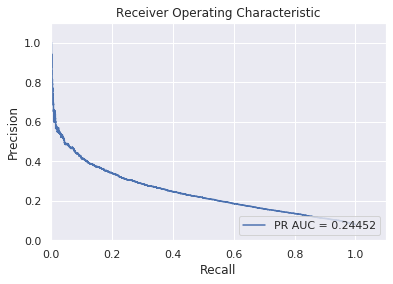

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.5f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.5f' % pr_auc)

Text(0.5, 1.0, 'Feature importance')

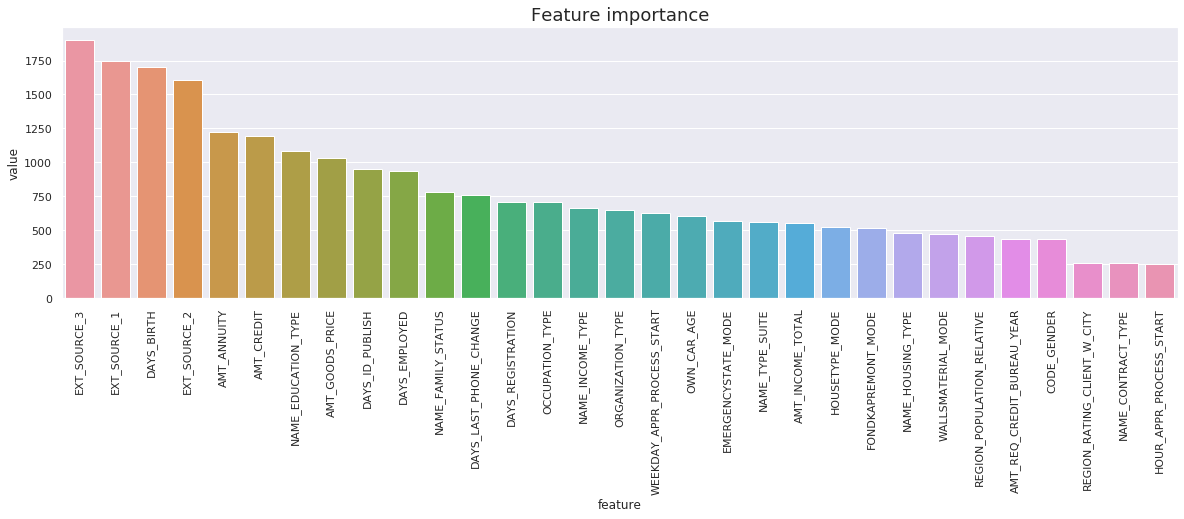

In [ ]:
to_plot_lgbm = pd.DataFrame(sorted(list(zip(my_new_clf_lgbm.feature_importances_, X_train1[new_lgbm].columns.values)), key=lambda x: x[0], reverse=True), columns=["value", "feature"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20, 5))
sns.barplot(x="feature", y="value", data=to_plot_lgbm);
plt.xticks(rotation=90)
plt.title("Feature importance", fontsize=18)

Качество несколько упало для каждого из алгоритмов, но время обучение сокртилось примерно на 40%, при том же количестве итераций.

### Бонус

__Задание 7. (Максимум 5 баллов)__

Градиентный бустинг при всех ограничениях зачастую является ультимативным решением для задач с табличными данными; соревнование от Home Credit не стало исключением. Предлагается любыми модификациями Catboost и LightGBM (другими моделями пользоваться нельзя), обработки данных и построения признаков получить высокое качество на __приватном__ наборе данных.
Баллы можно получить за следующие значения метрики в inclass-соревновании на Kaggle:
* 0.7955 - 1 балл
* 0.7975 - 3 баллов
* 0.80 - 5 баллов.

При сдаче этого задания необходимо приложить код, с помощью которого можно получить ту же самую метрику, что и в вашем посылке в соревновании. Если решение не будет воспроизводимым, задание засчитано не будет.

Учетная запись на kaggle: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Задание 8. (0.5 балла)__ Обратите внимание, что в соревновании метрикой выступает AUC-ROC, у нас же до этого оптимизировался AUC-PR. Можно ли утверждать, что нет необходимости в переобучении моделей для максимизации новой метрики, если мы нашли лучший алгоритм с точки зрения AUC-PR?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ